In [69]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [70]:
class LogisticRegression(object):
    
    def __init__(self,eta=0.0001,iterations=20,random_state = 1,file_path = 'iris.data'):
        self.eta = eta
        self.file_path = file_path
        self.interations = iterations
        self.random_state = random_state
    
    def GetData(self):
        iris = datasets.load_iris()
        X = iris.data[:,[2,3]]
        y = iris.target
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=1, stratify=y)
        self.X = X_train[y_train != 2]
        self.y = y_train[y_train != 2]
        return self
        
    def InitializeWeight(self):
#         Container for the slow Mersenne Twister pseudo-random number generator
        rs = np.random.RandomState(self.random_state)
        self.WeightArray = rs.normal(loc = 0.0,scale = 0.01,size = 1 + self.X.shape[1] )
        return self
    
    def NetInputFunction(self,x):
#         To get the input value from X and weight.
        return np.dot(x,self.WeightArray[1:]) + 1 * self.WeightArray[0]
    
    def ActivationFunction(self,x):
#         To activate the input value by activation funtion(sigmoid function).    
        return 1./(1+np.exp(-np.clip(x,-250,250)))
        
    def Learn(self):
        self.costList = []
        for i in range(self.interations): 
#             Use GD to update the weightarray, it's the same as adaline.
            acitived_X = self.ActivationFunction(self.NetInputFunction(self.X))
            error =  self.y - acitived_X 
            updat_0 = self.eta*np.sum(error)*1
            update_1 = self.eta*self.X.T.dot(error)
            self.WeightArray[0] += updat_0
            self.WeightArray[1:,] += update_1
            cost = -(self.y).dot(np.log(acitived_X)) - (1 - self.y).dot(np.log(1-acitived_X))
            self.costList.append(cost)
        return self
    
    def Pridict(self,x):
#         np.where: Return elements chosen from x or y depending on condition.
        return np.where(self.ActivationFunction(self.NetInputFunction(x)) >= 0.5,1,0)

In [71]:
def PlotErrorLine(errorList):
    plt.figure(figsize=(8,6),dpi=80)
    plt.plot(range(1,len(errorList)+1),errorList,color='forestgreen')
    plt.xlabel('Interation')
    plt.ylabel('Cost')
    plt.title('Cost and Epochs')
    plt.show()
    
def PlotDesicionRegions(X,y,classifier,resolustion = 0.02):
    x1_min,x1_max = X[:,0].min() - 1,X[:,0].max() + 1
    x2_min,x2_max = X[:,1].min() - 1,X[:,1].max() + 1
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolustion),
                          np.arange(x2_min,x2_max,resolustion))
    xy = np.array([xx1.ravel(),xx2.ravel()]).T 
    pridcited_xy = classifier.Pridict(xy)
    z = pridcited_xy.reshape(xx1.shape)
    cmap = ListedColormap(['palegreen','yellow'])
    plt.figure(figsize=(8,6),dpi=80)
    markers = ['v','^']
    plt.contourf(xx1,xx2,z,alpha = 0.6,cmap = cmap)
    for i,j in enumerate(np.unique(y)):
        plt.scatter(x = X[y == j,0],y = X[y == j,1],marker = markers[i],label = j)
    plt.show()

<IPython.core.display.Javascript object>


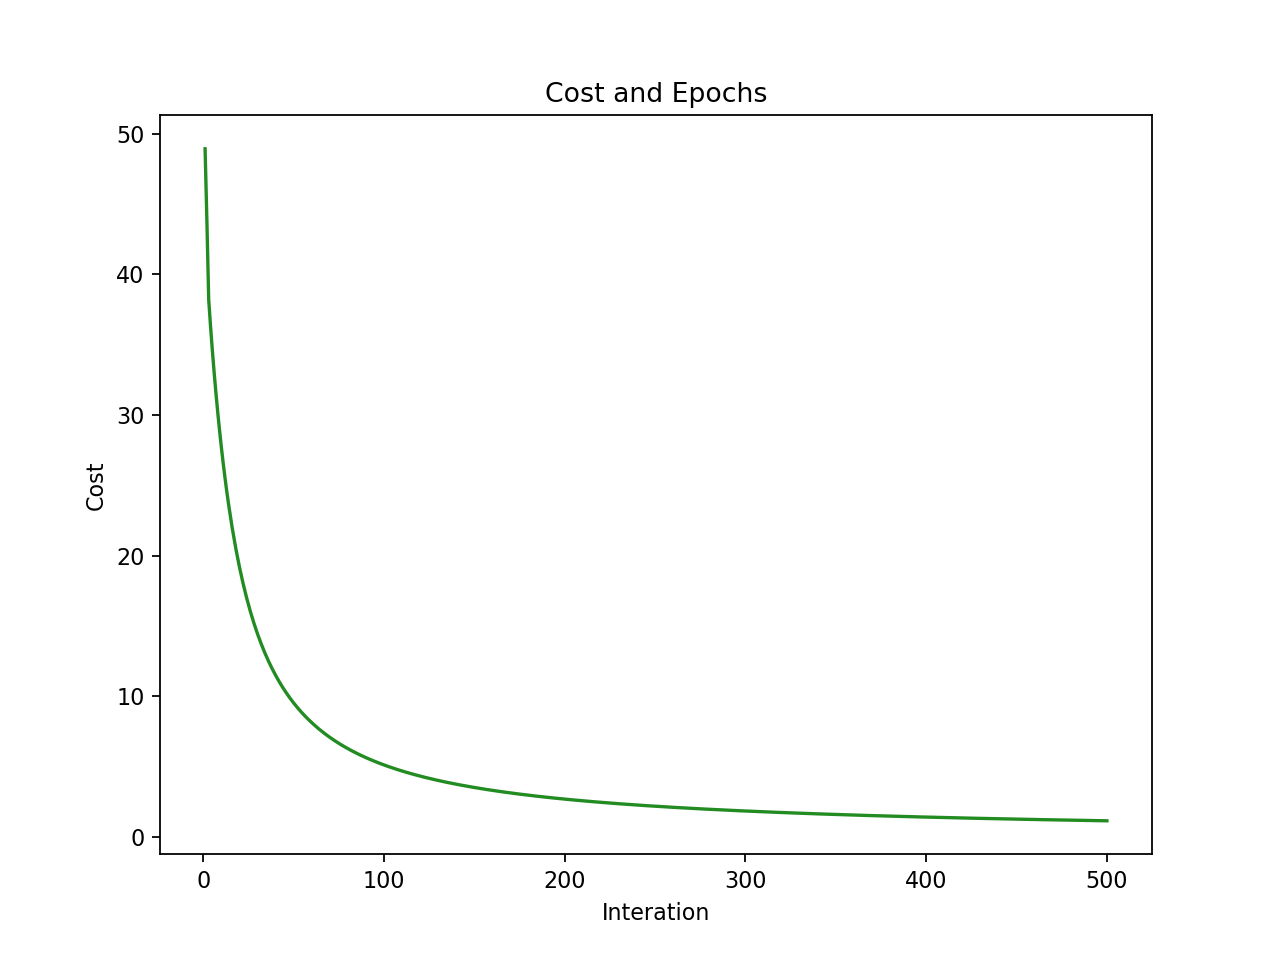

<IPython.core.display.Javascript object>


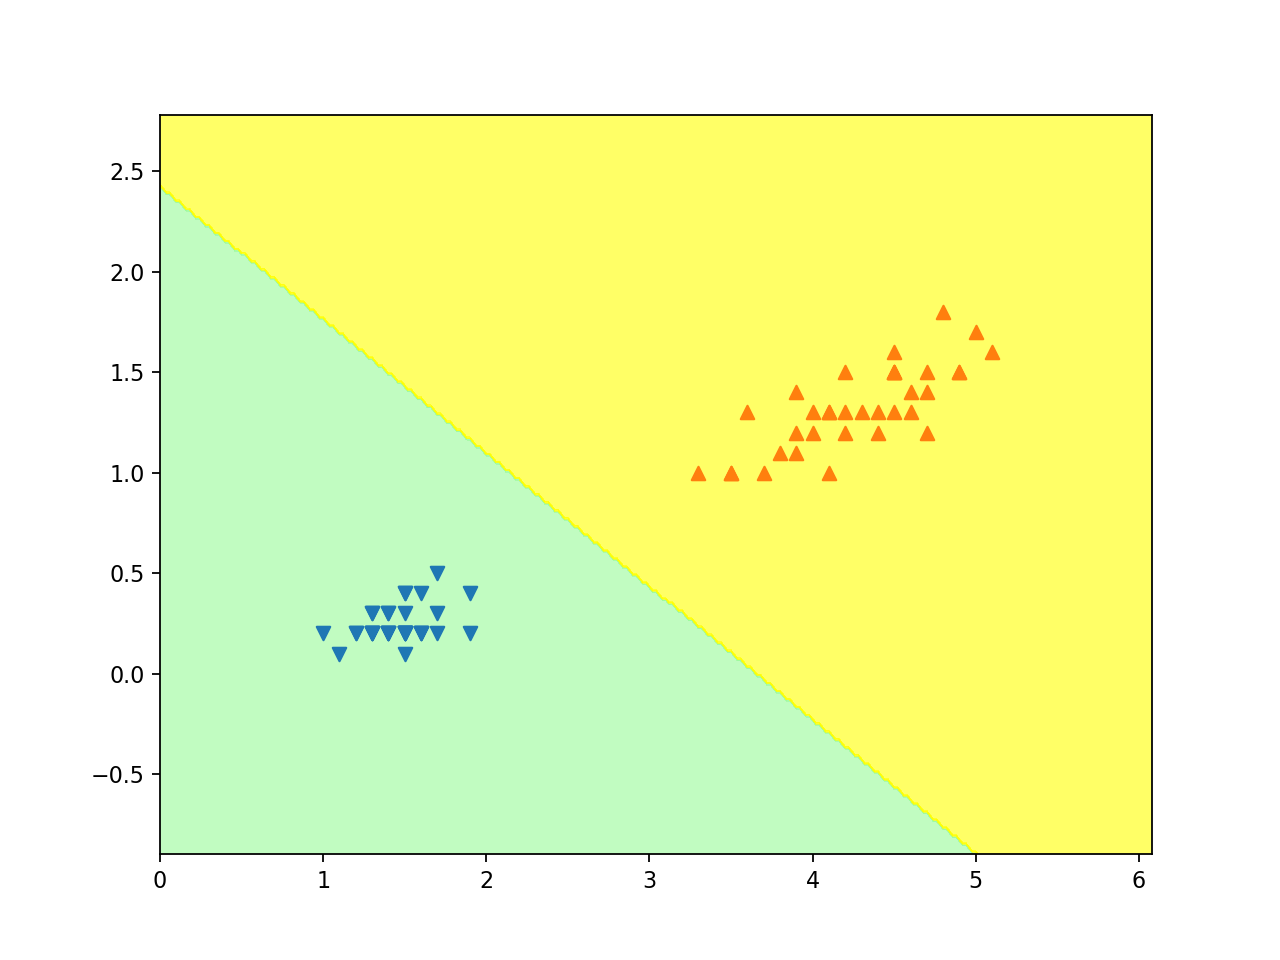

In [72]:
if __name__ == '__main__':
    #First initialize an object
    LR = LogisticRegression(eta=0.01,iterations=500)
    #Then read the data
    LR.GetData()
    #Initialize weightArray using normal dittribution
    LR.InitializeWeight()
    #Train and learn!!!
    LR.Learn()
    PlotErrorLine(LR.costList)
    PlotDesicionRegions(LR.X,LR.y,LR) 